# [Generative adversarial network](https://github.com/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec9-GAN.ipynb)

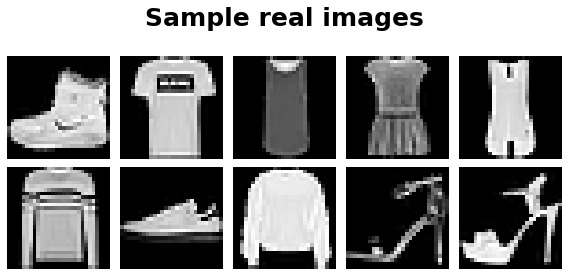

In [32]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


def display_images(data, title="Sample_images"):
    fig, axes = plt.subplots(2, 5, figsize=(8, 4))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.suptitle(title, fontsize=25, fontweight="bold")
    fig.set_tight_layout("tight")


display_images(X_train[:25], "Sample real images")

## Preparing data

In [33]:
import tensorflow as tf

batch_size = 32
X_train = X_train.astype("float32") / 255.0
dataset = (
    tf.data.Dataset.from_tensor_slices(X_train)
    .shuffle(buffer_size=1000)
    .batch(batch_size, drop_remainder=True)
    .prefetch(1)
)

In [34]:
dataset

<PrefetchDataset element_spec=TensorSpec(shape=(32, 28, 28), dtype=tf.float32, name=None)>

In [35]:
dataset.take(1)

<TakeDataset element_spec=TensorSpec(shape=(32, 28, 28), dtype=tf.float32, name=None)>

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


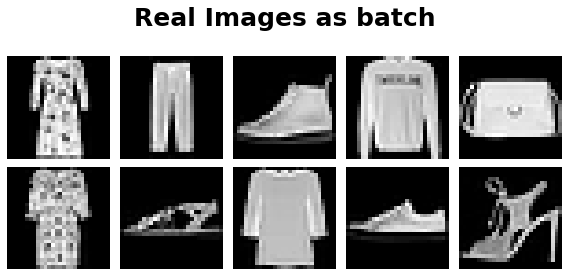

In [36]:
for data in dataset.take(1):
    print(type(data))
    print(type(data.numpy()))
    display_images(data, "Real Images as batch")

## Build model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.initializers import LecunNormal

coding_size = 30
image_shape = X_train[0].shape
print(image_shape)

generator = Sequential(
    [
        Dense(
            100,
            activation="selu",
            kernel_initializer=LecunNormal(),
        ),
        Dense(
            150,
            activation="selu",
            kernel_initializer=LecunNormal(),
        ),
        Dense(image_shape[0] * image_shape[1], activation="sigmoid"),
        Reshape(image_shape),
    ]
)

discriminator = Sequential(
    [
        Flatten(input_shape=image_shape),
        Dense(
            100,
            activation="selu",
            kernel_initializer=LecunNormal(),
        ),
        Dense(
            150,
            activation="selu",
            kernel_initializer=LecunNormal(),
        ),
        Dense(1, activation="sigmoid"),
    ]
)

generative_adversarial_network = Sequential([generator, discriminator])

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
generative_adversarial_network.compile(loss="binary_crossentropy", optimizer="rmsprop")

(28, 28)


## Training loop

In [38]:
tf.constant([[[0.0]]*batch_size + [[1.0]]*batch_size])

<tf.Tensor: shape=(1, 64, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)>

epoch epoch=0


2022-06-02 10:50:18.547413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 10:50:18.981705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


epoch epoch=1


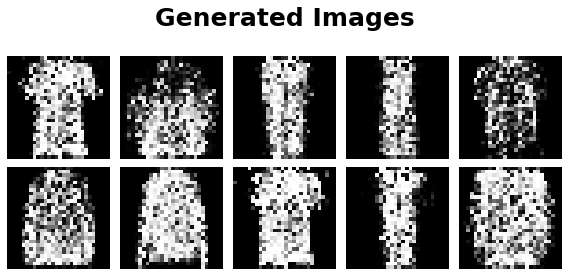

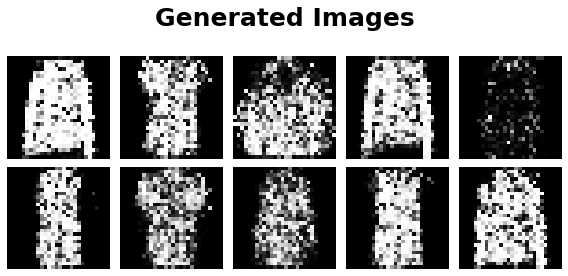

In [39]:
def train_generative_adversarial_network(
    generative_adversarial_network, dataset, batch_size, coding_size, number_of_epochs=50
):
    generator, discriminator = generative_adversarial_network.layers
    for epoch in range(number_of_epochs):
        print(f"epoch {epoch=}")

        for X_batch in dataset:
            # Phase 1 - Discriminator
            noise = tf.random.normal([batch_size, coding_size])
            generated_image = generator(noise)
            X_fake_real = tf.concat([generated_image, X_batch], axis=0)
            y_train1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_real, y_train1)

            # Phase 2 - Generator
            noise = tf.random.normal([batch_size, coding_size])
            y_train2 = tf.constant([[1.0]] * batch_size)
            discriminator.trainable = False
            generative_adversarial_network.train_on_batch(noise, y_train2)

        display_images(generator(noise).numpy(), "Generated Images")


train_generative_adversarial_network(
    generative_adversarial_network, dataset, batch_size, coding_size, number_of_epochs=2
)